<a href="https://colab.research.google.com/github/dkapesa/dkapesa/blob/main/60_Decibels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/Trial Task 1 - Business Analyst.xlsx'

In [ ]:
first_access = pd.read_excel(file_path, sheet_name='first_access')
quality_of_life = pd.read_excel(file_path, sheet_name='quality_of_life')
financial_goal = pd.read_excel(file_path, sheet_name='financial_goal')
benchmarks = pd.read_excel(file_path, sheet_name='benchmarks')

In [ ]:
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

first_access = clean_column_names(first_access)
quality_of_life = clean_column_names(quality_of_life)
financial_goal = clean_column_names(financial_goal)
benchmarks = clean_column_names(benchmarks)


In [ ]:
first_access = first_access.drop_duplicates()
quality_of_life = quality_of_life.drop_duplicates()
financial_goal = financial_goal.drop_duplicates()

In [ ]:
first_access = first_access.fillna('Unknown')
quality_of_life = quality_of_life.fillna('Unknown')
financial_goal = financial_goal.fillna('Unknown')

In [ ]:
for df in [first_access, quality_of_life, financial_goal]:
    df['year_purchase'] = pd.to_numeric(df.get('year_purchase', pd.Series(dtype='float')), errors='coerce')
    df['active_client'] = df['active_client'].astype(str)


In [ ]:
aggregated_data = pd.concat([first_access, quality_of_life, financial_goal], ignore_index=True)

aggregated_data.to_csv('aggregated_responses.csv', index=False)

In [ ]:
# Checking for non-numeric values in the 'answer' column
def convert_to_numeric(value):
    try:
        return float(value)  # Convert if possible
    except ValueError:
        # This to handle specific categorical responses (e.g., 'Yes' = 1, 'No' = 0)
        if value.lower() == 'yes':
            return 1
        elif value.lower() == 'no':
            return 0
        else:
            return None

# Applying conversion to 'answer' column
merged_data['numeric_answer'] = merged_data['answer'].apply(convert_to_numeric)

# Drop rows where 'numeric_answer' or 'value' is not numeric
merged_data = merged_data.dropna(subset=['numeric_answer', 'value'])

# Calculating the performance difference
merged_data['performance_difference'] = merged_data['numeric_answer'] - merged_data['value']


<ipython-input-12-3b11ada67668>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['performance_difference'] = merged_data['numeric_answer'] - merged_data['value']


In [ ]:
# Ensuring that the 'answer' column is numeric
merged_data['answer_numeric'] = pd.to_numeric(merged_data['answer'], errors='coerce')

# Grouping by company and calculating mean performance difference and answers
summary = merged_data.groupby('company').agg({
    'performance_difference': 'mean',          # Mean performance difference
    'answer_numeric': 'mean'                   # Mean numeric answers
}).reset_index()

# Renamning the columns for clarity
summary.columns = ['Company', 'Avg Performance Difference', 'Avg Numeric Answer']

# Save summary to a CSV file
summary.to_csv('summary_for_ceos.csv', index=False)

# Print summary
print(summary)

           Company  Avg Performance Difference  Avg Numeric Answer
0          AhoraSi                   -0.093826                 NaN
1  Banco Patagonia                   -0.064028                 NaN


<ipython-input-15-b244ed2cfc78>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Company', y='Avg Performance Difference', palette='viridis')


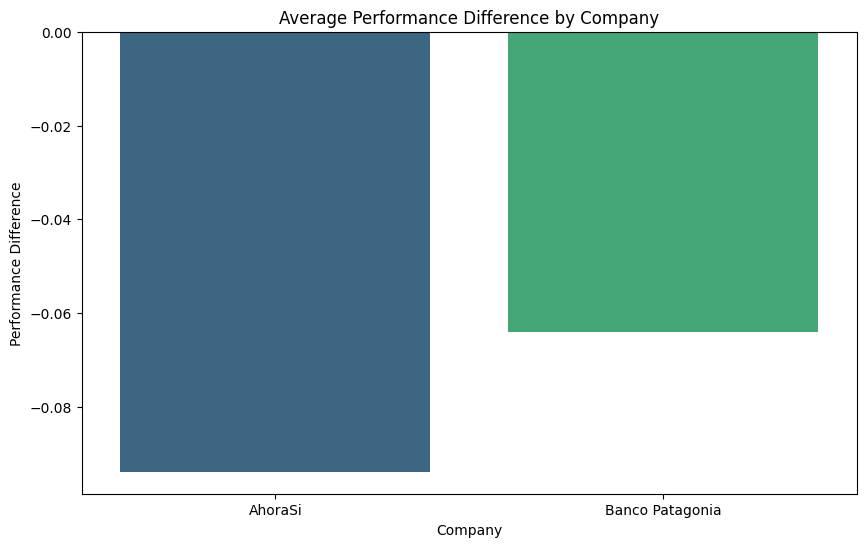

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of performance differences
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='Company', y='Avg Performance Difference', palette='viridis')
plt.title('Average Performance Difference by Company')
plt.ylabel('Performance Difference')
plt.xlabel('Company')
plt.show()

In [ ]:
from google.colab import files

# Save aggregated table
aggregated_data.to_csv('aggregated_responses.csv', index=False)

# Download the file
files.download('aggregated_responses.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save CEO summary
summary.to_csv('summary_for_ceos.csv', index=False)

# Download the file
files.download('summary_for_ceos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
indicator_summary = merged_data.groupby(['company', 'indicator']).agg({
    'performance_difference': 'mean'
}).reset_index()

print(indicator_summary)


           company     indicator  performance_difference
0          AhoraSi  first_access               -0.093826
1  Banco Patagonia  first_access               -0.064028


In [ ]:
# checking missing or anomalous values
missing_values = aggregated_data.isnull().sum()
print(missing_values)

respondent_id         0
company             472
survey                0
country               0
region              472
gender                0
indicator           345
answer              817
active_client         0
year_purchase       472
quality_of_life    1162
company_name       1035
region_name        1035
answer_given       1035
purchase_year      1035
dtype: int64


In [ ]:
# looking at demographic factors
demographic_analysis = merged_data.groupby(['company', 'gender']).agg({
    'performance_difference': 'mean'
}).reset_index()

print(demographic_analysis)

           company   gender  performance_difference
0          AhoraSi   Female               -0.137945
1          AhoraSi     Male                0.019306
2          AhoraSi  Unknown               -0.036250
3  Banco Patagonia   Female               -0.137945
4  Banco Patagonia     Male                0.090869
5  Banco Patagonia  Unknown               -0.202917


In [ ]:
print(merged_data.dtypes)


respondent_id               int64
company                    object
survey                     object
country                    object
region                     object
gender                     object
indicator                  object
answer                     object
active_client              object
year_purchase             float64
quality_of_life            object
company_name               object
region_name                object
answer_given               object
purchase_year             float64
indicator_name             object
benchmark                  object
benchmark_detail           object
data_type                  object
value                     float64
numeric_answer            float64
performance_difference    float64
answer_numeric            float64
dtype: object


In [ ]:
numeric_data = merged_data.select_dtypes(include=['number'])


In [ ]:
# comparing benchmarks
benchmark_comparison = (
    merged_data.groupby(['indicator'])
    .agg({
        'value': 'mean',  # Replace 'value' with the correct numeric column names
        'performance_difference': 'mean'  # Ensure 'performance_difference' is numeric
    })
    .reset_index()
)

print(benchmark_comparison)

      indicator    value  performance_difference
0  first_access  0.53625               -0.078279


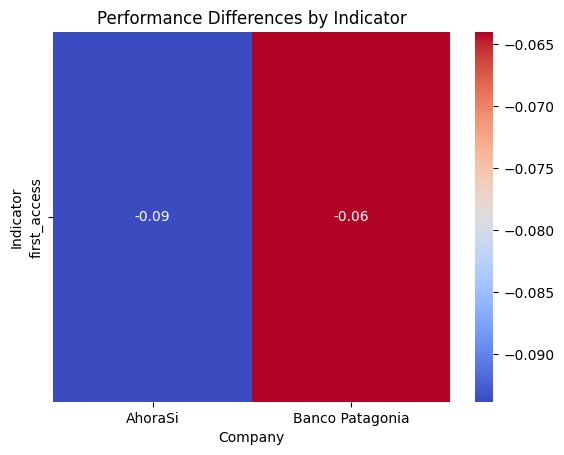

In [ ]:
heatmap_data = indicator_summary.pivot(index='indicator', columns='company', values='performance_difference')

sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Performance Differences by Indicator')
plt.ylabel('Indicator')
plt.xlabel('Company')
plt.show()
